In [ ]:
# !git clone git@github.com:balaprasanna/fruits-vegie-classifer.git

Cloning into 'fruits-vegie-classifer'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
# !wget https://github.com/balaprasanna/fruits-vegie-classifer/blob/master/one_epoch.pth?raw=true
# !mv 'one_epoch.pth?raw=true' './Fruit-Images-Dataset/one_epoch.pth'
!mv './Fruit-Images-Dataset/one_epoch.pth' './Fruit-Images-Dataset/models/one_epoch.pth'

In [ ]:
# !git clone https://github.com/Horea94/Fruit-Images-Dataset.git
# !ls Fruit-Images-Dataset/Training

In [ ]:
from fastai.core import *
from fastai.vision import *

In [ ]:
folder = './Fruit-Images-Dataset/models'
# path = Path(folder)
!mkdir {folder}

mkdir: cannot create directory ‘./Fruit-Images-Dataset/models’: File exists


In [ ]:
# path.mkdir("models")

TypeError: ignored

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train="Training", bs=128, valid_pct=0.2, test="Test" , ds_tfms=tfms, size=224 )

In [ ]:
data.c

106

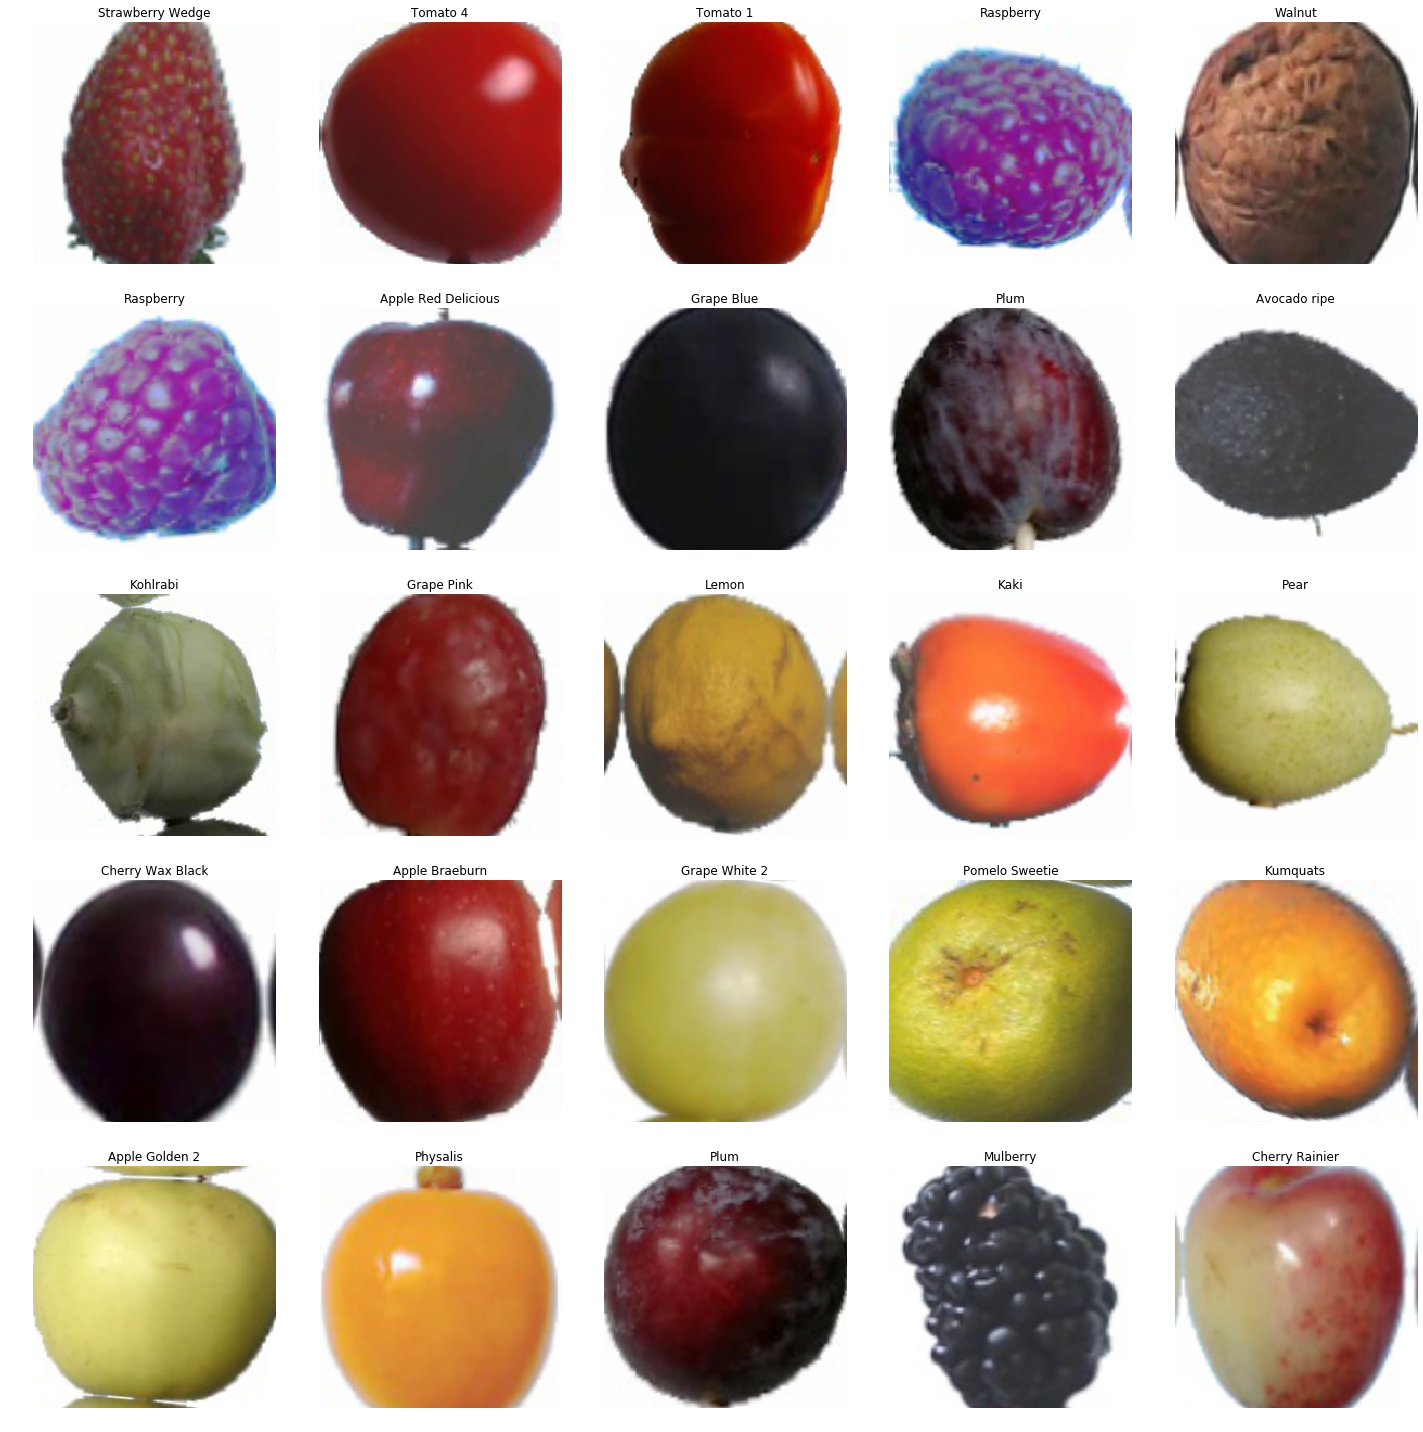

In [ ]:
data.show_batch()

In [ ]:
data

ImageDataBunch;

Train: LabelList (57860 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato 3,Tomato 3,Tomato 3,Tomato 3,Tomato 3
Path: Fruit-Images-Dataset;

Valid: LabelList (14465 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lemon,Pineapple,Salak,Cactus fruit,Tomato Yellow
Path: Fruit-Images-Dataset;

Test: LabelList (18150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: Fruit-Images-Dataset

In [ ]:
data.batch_size

128

In [ ]:
data.batch_stats()

[tensor([0.6656, 0.5500, 0.4593]), tensor([0.3027, 0.3518, 0.3822])]

In [ ]:
data.device

device(type='cuda', index=0)

In [ ]:
data.dl_tfms

[]

In [ ]:
data.dls

[DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f837277ba58>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f837f04e268>),
 DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f8372947470>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f837f04e268>),
 DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f8372869780>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f837f04e268>),
 DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f837277b860>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f837f04e268>),
 DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f8372869668>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f837f04e268>)]

In [ ]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
# data.label_list

# data.normalize

data.num_workers

2

In [ ]:
data.path

PosixPath('Fruit-Images-Dataset')

In [ ]:
# data.pre_transform

## Training

In [ ]:
#After applying transforms & resizing inputs to 224

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy ,callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 133594198.33it/s]


In [ ]:
# learn.fit_one_cycle(1, 1e-3)
# learn.save("one_epoch_v2")
learn_inf = learn.load("one_epoch")

In [ ]:
# learn.save("one_epoch_v2")
learn.export()

In [ ]:
img = learn.data.train_ds[0][0]
learn.predict(img)

(Category Apple Golden 2,
 tensor(3),
 tensor([8.4931e-07, 8.3177e-06, 4.9584e-05, 9.8186e-01, 1.4477e-02, 2.1409e-03,
         9.8417e-06, 5.5681e-07, 3.7972e-06, 3.0335e-06, 8.6818e-07, 9.3772e-06,
         5.0211e-05, 7.9707e-07, 8.4037e-06, 3.0691e-06, 2.5427e-06, 6.1363e-06,
         1.8810e-06, 8.2204e-07, 7.2013e-07, 3.4824e-06, 2.7464e-06, 5.9881e-07,
         1.9573e-05, 4.6821e-06, 4.9745e-07, 3.5258e-06, 5.7727e-06, 1.2529e-06,
         1.5909e-07, 8.4567e-07, 6.0473e-07, 3.2470e-07, 1.8465e-05, 3.0302e-06,
         6.2538e-05, 1.9328e-04, 3.2915e-05, 1.7704e-05, 1.5955e-05, 5.3077e-06,
         2.1725e-06, 1.5926e-06, 9.7662e-06, 8.0609e-06, 1.1373e-06, 1.8722e-04,
         5.3515e-07, 2.0768e-06, 2.3684e-06, 4.9397e-06, 3.2579e-06, 5.1061e-07,
         9.9360e-06, 5.7504e-07, 3.6789e-06, 4.0442e-06, 1.0994e-05, 7.8477e-07,
         2.3048e-06, 1.6059e-05, 1.4868e-07, 2.9331e-07, 2.4663e-06, 4.2285e-07,
         3.3543e-04, 4.3991e-05, 2.2706e-05, 3.1391e-07, 2.5452e-06, 6.

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)

In [ ]:
interp = ClassificationInterpretation(learn, preds, y, losses)

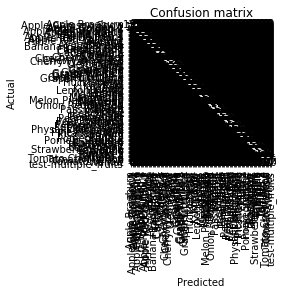

In [ ]:
interp.plot_confusion_matrix(slice_size=10)

In [ ]:
interp.confusion_matrix(slice_size=10)


array([[147,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0, 111,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0, 133,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0, 132, ...,   0,   0,   0,   0],
       ...,
       [  0,   0,   0,   0, ...,  83,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0, 103,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0, 199,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,  18]])

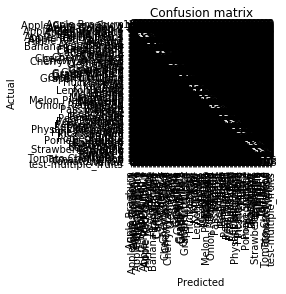

In [ ]:
interp.plot_confusion_matrix(slice_size=10)


In [ ]:
interp.most_confused()

[('Apple Golden 3', 'Apple Granny Smith', 1),
 ('Apple Red 2', 'Apple Braeburn', 1),
 ('Cherry Rainier', 'Cherry 2', 1),
 ('Grapefruit White', 'Lemon', 1),
 ('Nectarine', 'Apple Braeburn', 1)]

In [ ]:
# Save model weights

# learn.save('one_epoch')

# # Export model for infrenece
# learn.export()

# Load model for infrence
learn_inf = load_learner(path)

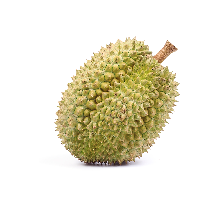

In [ ]:
# TO predict

# !wget 'https://images-na.ssl-images-amazon.com/images/I/51TcdS9z2fL._SY300_QL70_.jpg'
# !mv './51TcdS9z2fL._SY300_QL70_.jpg' ./orange.jpg

test_file = 'WEB-Carré-durian.png'

img1 = open_image(test_file)
img1.show()


In [ ]:
!wget "https://www.alimentarium.org/en/system/files/thumbnails/image/WEB-Carr%C3%A9-durian.png"

--2019-06-21 08:30:11--  https://www.alimentarium.org/en/system/files/thumbnails/image/WEB-Carr%C3%A9-durian.png
Resolving www.alimentarium.org (www.alimentarium.org)... 107.154.113.25
Connecting to www.alimentarium.org (www.alimentarium.org)|107.154.113.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1940871 (1.9M) [image/png]
Saving to: ‘WEB-Carré-durian.png’

WEB-Carré-durian.pn 100%[===================>]   1.85M  --.-KB/s    in 0.03s   

2019-06-21 08:30:13 (57.1 MB/s) - ‘WEB-Carré-durian.png’ saved [1940871/1940871]



In [ ]:
learn_inf = load_learner(path)
pred_class,pred_idx,outputs = learn_inf.predict(img1)
pred_class

Category test-multiple_fruits